<a href="https://colab.research.google.com/github/divyalaldinani/Spaceship-Titanic-Kaggle-Competitions/blob/main/01_kaggle_competition_spaceship_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [183]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [184]:
df = pd.read_csv('train.csv')

In [185]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [186]:
# from google.colab import sheets
# sheet = sheets.InteractiveSheet(df=df)

In [187]:
df.columns.tolist()

['PassengerId',
 'HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'Age',
 'VIP',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Name',
 'Transported']

In [188]:
df = df.drop({'PassengerId', 'Age', 'VIP', 'RoomService', 'ShoppingMall', 'Spa', 'VRDeck', 'Name'}, axis = 1)

In [189]:
cabins = df['Cabin'].unique()

In [190]:
df['floor'] = df['Cabin'].astype("string").str[0]

In [191]:
df

,HomePlanet,CryoSleep,Cabin,Destination,FoodCourt,Transported,floor
0,Europa,False,B/0/P,TRAPPIST-1e,0.0,False,B
1,Earth,False,F/0/S,TRAPPIST-1e,9.0,True,F
2,Europa,False,A/0/S,TRAPPIST-1e,3576.0,False,A
3,Europa,False,A/0/S,TRAPPIST-1e,1283.0,False,A
4,Earth,False,F/1/S,TRAPPIST-1e,70.0,True,F
...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,6819.0,False,A
8689,Earth,True,G/1499/S,PSO J318.5-22,0.0,False,G
8690,Earth,False,G/1500/S,TRAPPIST-1e,0.0,True,G
8691,Europa,False,E/608/S,55 Cancri e,1049.0,False,E


In [192]:
df = df.drop({'Cabin'}, axis = 1)

In [193]:
df

,HomePlanet,CryoSleep,Destination,FoodCourt,Transported,floor
0,Europa,False,TRAPPIST-1e,0.0,False,B
1,Earth,False,TRAPPIST-1e,9.0,True,F
2,Europa,False,TRAPPIST-1e,3576.0,False,A
3,Europa,False,TRAPPIST-1e,1283.0,False,A
4,Earth,False,TRAPPIST-1e,70.0,True,F
...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,6819.0,False,A
8689,Earth,True,PSO J318.5-22,0.0,False,G
8690,Earth,False,TRAPPIST-1e,0.0,True,G
8691,Europa,False,55 Cancri e,1049.0,False,E


In [194]:
df['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

In [195]:
df = pd.get_dummies(df, columns = ['Destination', 'HomePlanet', 'floor'])

In [196]:
df

,CryoSleep,FoodCourt,Transported,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,floor_A,floor_B,floor_C,floor_D,floor_E,floor_F,floor_G,floor_T
0,False,0.0,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False
1,False,9.0,True,False,False,True,True,False,False,False,False,False,False,False,True,False,False
2,False,3576.0,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False
3,False,1283.0,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False
4,False,70.0,True,False,False,True,True,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,False,6819.0,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False
8689,True,0.0,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False
8690,False,0.0,True,False,False,True,True,False,False,False,False,False,False,False,False,True,False
8691,False,1049.0,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False


In [197]:
df['CryoSleep'][0]

False

In [198]:
# # replacing False by 0 and True by 1
# df = df.replace({True: 1, False: 0})

In [199]:
df['Transported'] #-> boolean data type

,Transported
0,False
1,True
2,False
3,False
4,True
...,...
8688,False
8689,False
8690,True
8691,False


In [200]:
# X, y = df.drop(columns = ['Transported']), df['Transported']
# X = np.nan_to_num(X)
# y = np.nan_to_num(y)
# # X = tf.convert_to_tensor(X, dtype = tf.float32)
# # y = tf.convert_to_tensor(y, dtype = tf.float32)
# # X, y

In [201]:
# Check if any cell has NaN or Inf values
df.isna().sum() #+ ((df == np.inf) | (df == -np.inf)).sum()
df.dropna(inplace=True)


In [202]:
X, y = df.drop(columns = ['Transported']), df['Transported']
# X = np.nan_to_num(X)
# y = np.nan_to_num(y)

scaler = StandardScaler()
X = scaler.fit_transform(X)
X = scaler.transform(X)

# X = tf.convert_to_tensor(X, dtype = tf.float32)
# y = tf.convert_to_tensor(y, dtype = tf.float32)
X, y

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


(array([[-2.30293166, -0.28363815, -1.77336321, ..., -2.15986643,
         -2.06431157, -1.02244583],
        [-2.30293166, -0.2836347 , -1.77336321, ...,  2.42907583,
         -2.06431157, -1.02244583],
        [-2.30293166, -0.28226837, -1.77336321, ..., -2.15986643,
         -2.06431157, -1.02244583],
        ...,
        [-2.30293166, -0.28363815, -1.77336321, ..., -2.15986643,
          2.74661275, -1.02244583],
        [-2.30293166, -0.28323633,  4.30883906, ..., -2.15986643,
         -2.06431157, -1.02244583],
        [-2.30293166, -0.28184242, -1.77336321, ..., -2.15986643,
         -2.06431157, -1.02244583]]),
 0       False
 1        True
 2       False
 3       False
 4        True
         ...  
 8688    False
 8689    False
 8690     True
 8691    False
 8692     True
 Name: Transported, Length: 8296, dtype: bool)

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train.values, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test.values, dtype=tf.float32)

In [204]:
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(1), # 1 hidden layer
#     tf.keras.layers.Dense(1) # 1 output layer
# ])

# model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
#               optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
#               metrics = ['accuracy']
# )

# model.fit(X, y, epochs = 100)

In [205]:
# drop_after_epochs = 8
def lr_scheduler(epochs):
  initial_lr = 0.01
  drop_rate = 1.1 # after fized number of epochs, lr = lr * drop rate
  drop_after_epochs = 20
  lr = initial_lr * ( drop_rate ** ( epochs//drop_after_epochs ))
  return lr

In [206]:
model_1 = tf.keras.Sequential([
    # tf.keras.layers.Dense(100, activation = 'relu'), # 1 hidden layer

    tf.keras.layers.Dense(64, activation = 'relu'), # 1 hidden layer
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Dense(32, activation = 'relu'), # 1 hidden layer
    tf.keras.layers.Dropout(0.3),

    # tf.keras.layers.Dense(50, activation = 'relu'), # 2 hidden layer
    tf.keras.layers.Dense(1, activation = 'sigmoid') # 1 output layer
])


model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
              metrics = ['accuracy']
)

# lr_schedule = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)
# drop_after_epochs = 8

# history = model_1.fit(X_train, y_train, epochs = 50, batch_size = 256) #, callbacks = [lr_schedule])
history = model_1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=256)


Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - accuracy: 0.5191 - loss: 1.0163 - val_accuracy: 0.6584 - val_loss: 0.6274
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6071 - loss: 0.7623 - val_accuracy: 0.6946 - val_loss: 0.5899
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6373 - loss: 0.6799 - val_accuracy: 0.7060 - val_loss: 0.5711
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6538 - loss: 0.7485 - val_accuracy: 0.7157 - val_loss: 0.5637
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6588 - loss: 0.6510 - val_accuracy: 0.7072 - val_loss: 0.5586
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6816 - loss: 0.6039 - val_accuracy: 0.7090 - val_loss: 0.5532
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6796 - loss: 0.7786 - val_accuracy: 0.7133 - val_loss: 0.5488
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6954 - loss: 0.5800 - val_accuracy: 0.7139 - val_loss

In [207]:
accuracy = history.history['accuracy']

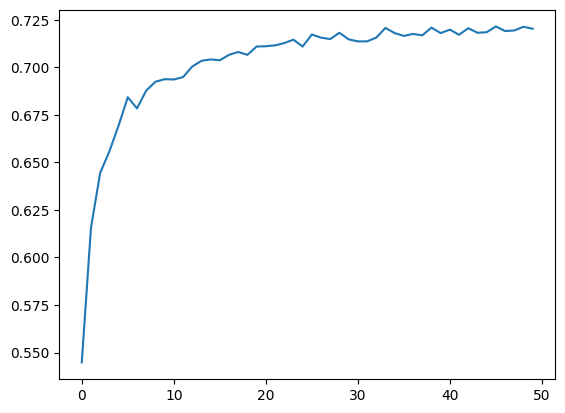

In [208]:
plt.plot(accuracy)
plt.show()

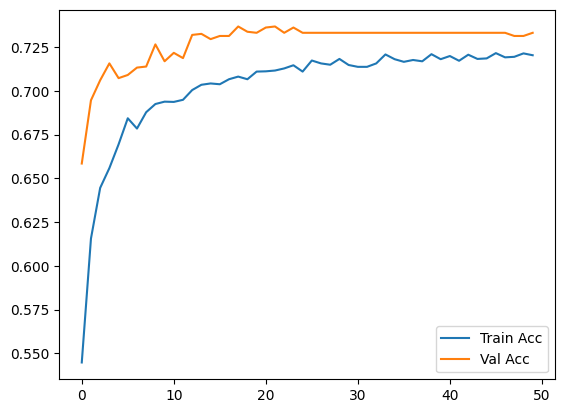

In [209]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.show()

In [210]:
model_1.evaluate(X_test, y_test)
# np.isnan(X_test).sum()


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7345 - loss: 0.5335


[0.5312576293945312, 0.733132541179657]

In [211]:

def lr_scheduler(epochs):
  initial_lr = 0.01
  drop_rate = 1.1 # after fixed number of epochs, lr = lr * drop rate
  drop_after_epochs = 20
  lr = initial_lr * ( drop_rate ** ( epochs//drop_after_epochs ))
  return lr

In [212]:
model_2 = tf.keras.Sequential([

    tf.keras.layers.Dense(40, activation = 'relu'),
    tf.keras.layers.Dense(20, activation = 'relu'), # 1 hidden layer
    # tf.keras.layers.Dense(2, activation = 'relu'), # 2 hidden layer
    # tf.kerivation = 'relu'), # 2 hidden layer
    tf.keras.layers.Dense(1, activation = 'sigmoid') # 1 output layer
])


model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1),
              metrics = ['accuracy']
)

lr_schedule = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)
history = model_2.fit(X, y, epochs = 50, batch_size = 256, callbacks = [lr_schedule])
# history = model_2.fit(X, y, epochs = 150)

Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.6341 - loss: 0.8532 - learning_rate: 0.0100
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7253 - loss: 0.6464 - learning_rate: 0.0100
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7282 - loss: 0.5803 - learning_rate: 0.0100
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7202 - loss: 0.5651 - learning_rate: 0.0100
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7219 - loss: 0.5647 - learning_rate: 0.0100
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7350 - loss: 0.5163 - learning_rate: 0.0100
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7293 - loss: 0.5288 - learning_rate: 0.0100
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7296 - loss: 0.5289 - learning_rate: 0.0100
Epoch 9/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7292 - loss: 0.5263 - learning_rate: 0.0100
Epoch 10/50
33/33 ━━━━━━━━━

In [213]:
accuracy = history.history['accuracy']

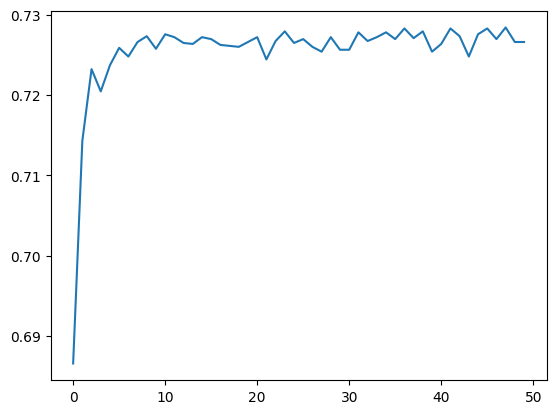

In [214]:
plt.plot(accuracy)
plt.show()